# ARIMA Model Price Forecasting
- Acurate for predictions at most 2 days out, assuming volatility is low for those days

In [47]:
#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
#https://www.kaggle.com/code/bogdanbaraban/ar-arima-lstm#ARIMA-model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [72]:
# Read the CSV file
data = pd.read_csv('prices.csv')
data = data[data['symbol']=='NFLX']
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)
test_data

,date,symbol,open,close,low,high,volume
675431,2015-08-10,NFLX,126.089996,123.029999,121.510002,126.500000,13424600.0
675928,2015-08-11,NFLX,120.010002,122.739998,120.000000,123.760002,11596800.0
676425,2015-08-12,NFLX,121.470001,120.510002,118.660004,122.449997,13822500.0
676922,2015-08-13,NFLX,120.989998,123.730003,119.339996,125.730003,15284400.0
677419,2015-08-14,NFLX,124.959999,123.389999,123.000000,125.000000,8667700.0
...,...,...,...,...,...,...,...
849088,2016-12-23,NFLX,125.610001,125.589996,125.080002,126.279999,2002100.0
849588,2016-12-27,NFLX,126.239998,128.350006,125.699997,129.050003,5276200.0
850088,2016-12-28,NFLX,129.070007,125.889999,125.760002,129.070007,4366700.0
850588,2016-12-29,NFLX,125.949997,125.330002,124.199997,126.139999,3443700.0


In [73]:
# Function to calculate ARIMA at every time stamp for every ticker
def predict_ARIMA_for_ticker(train_data, test_data):
    # Group data by ticker symbol
    grouped_data = data.groupby('symbol')
    for ticker, ticker_data in grouped_data:
        history = train_data[train_data['symbol'] == ticker]['open'].values.tolist()
        y = test_data[test_data['symbol']==ticker]['open'].values.tolist()
        # making prediction
        predictions = []
        model = ARIMA(history, order = (1,1,0))
        model_fit = model.fit()
        y_pred = model_fit.forecast()[0] 
        predictions.append(y_pred)
        history.append(y[0])
        #roll preds
        for i in range(1,len(y)):
            model = ARIMA(history, order=(1,1,0))
            model_fit = model.fit()
            y_pred = model_fit.forecast()[0]
            predictions.append(y_pred)
            history.append(y[i])
        
        
    return y, predictions

In [74]:
y, preds = predict_ARIMA_for_ticker(train_data, test_data)#[data['symbol'] == 'AAPL']) #computation of all options could take hour, using just AAPL for demo purposes

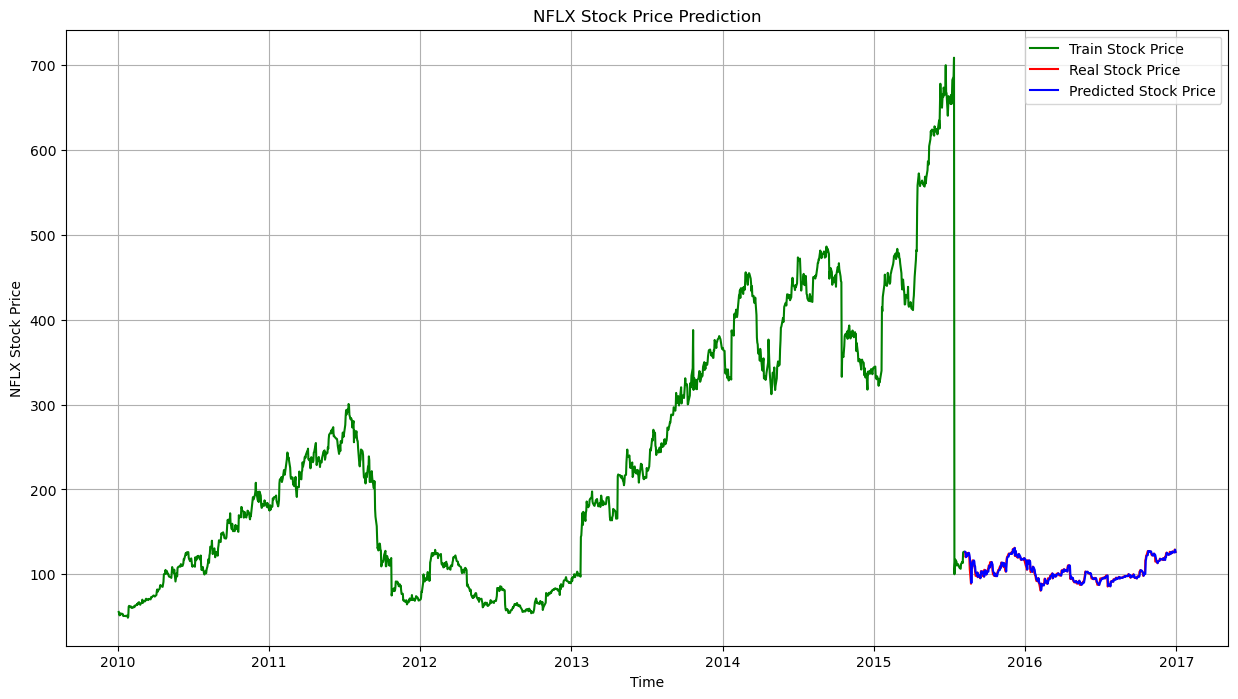

In [83]:
dates_tr = pd.to_datetime(train_data['date'], format='%Y-%m-%d')
dates_tst = pd.to_datetime(test_data['date'], format='%Y-%m-%d')
dates = pd.to_datetime(data['date'], format = '%Y-%m-%d')
plt.figure(figsize=(15,8))

# Plotting train stock price
plt.plot(dates_tr, train_data['open'], color='green', label='Train Stock Price')

# Plotting real stock price
plt.plot(dates_tst, y, color='red', label='Real Stock Price')

# Plotting predicted stock price
plt.plot(dates_tst, preds, color='blue', label='Predicted Stock Price')

# Plotting Volatility
plt.plot(dates, data[''])

# Adding title and labels
plt.title(f"{data['symbol'].iloc[0]} Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel(f"{data['symbol'].iloc[0]} Stock Price")

# Adding legend
plt.legend()

# Adding grid

plt.grid(True)
plt.show()

Drastic dropoff in price in 2014 from AAPL's 7-1 share split in Jun 2014

In [76]:
import math
mse = mean_squared_error(y, preds)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, preds)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, preds))
print('RMSE: '+str(rmse))

MSE: 11.092963711725172
MAE: 2.1573955498172945
RMSE: 3.3306101110344892


In [89]:
model = ARIMA(data['open'], order=(1, 1, 0))  # Adjust order as needed
model_fit = model.fit()
print(model_fit.forecast(steps=5))

1762    126.223904
1763    126.224797
1764    126.224748
1765    126.224750
1766    126.224750
Name: predicted_mean, dtype: float64


C:\Users\kraus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kraus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kraus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kraus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\kraus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio